In [1]:
#Import Relevant Keras Deep Learning Modules
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.models import load_model
from keras import backend as K

#Import Relevant Data Science Modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [5]:
path2model = "C:/Users/alex/Hands-On-Machine Learning/Project - Mammography/Models/"
modelnames = ["Shallower_CNN_Case0.h5",
              "Shallower_CNN_Case0_Layered.h5",
              "Shallower_CNN_Case1_100.h5",
              "Shallower_CNN_Case1_Layered.h5",
              "Shallower_CNN_Case2.h5",
              "Shallower_CNN_Case2_Layered.h5"]

model_list = [load_model(path2model + modelnames[i]) for i in range(len(modelnames))]

In [9]:
historynames = ["Shallower_CNN_Case0_Hist.npy",
              "Shallower_CNN_Case0_Hist_Layered.npy",
              "Shallower_CNN_Case1_Hist_100.npy",
              "Shallower_CNN_Case1_Hist_Layered.npy",
              "Shallower_CNN_Case2_Hist.npy",
              "Shallower_CNN_Case2_Hist_Layered.npy",]

history_list = [np.load(path2model + historynames[i]) for i in range(len(historynames))]

In [15]:
path2dat = "C:/Users/alex/Hands-On-Machine Learning/Project - Mammography/Data/Processed/"
test_images = np.load(path2dat + "test_images.npy")
test_labels = np.load(path2dat + "test_labels.npy")

In [16]:
#Test Results

prediction_list = [model_list[i].predict(test_images,batch_size=64) for i in range(len(modelnames))]

In [45]:
predicted_list = [(prediction_list[i] >= 0.5)*1 for i in range(len(prediction_list))]

In [ ]:
models_proba = [np.squeeze(np.transpose(prediction_list[i])) for i in range(len(prediction_list))]
models_pred =  [np.squeeze(np.transpose(predicted_list[i])) for i in range(len(prediction_list))]

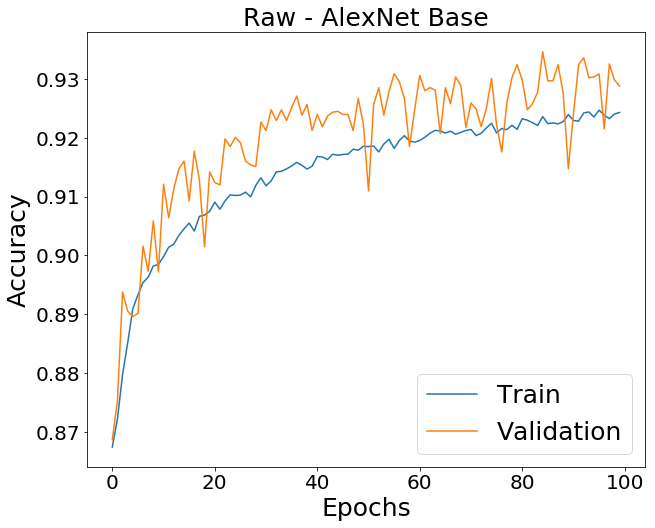

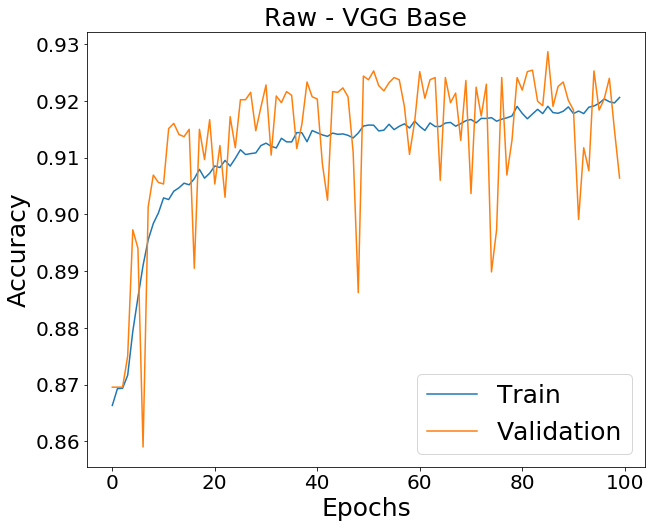

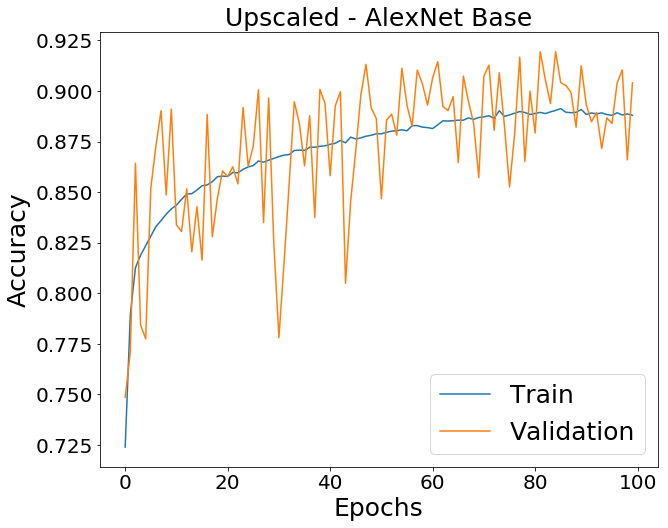

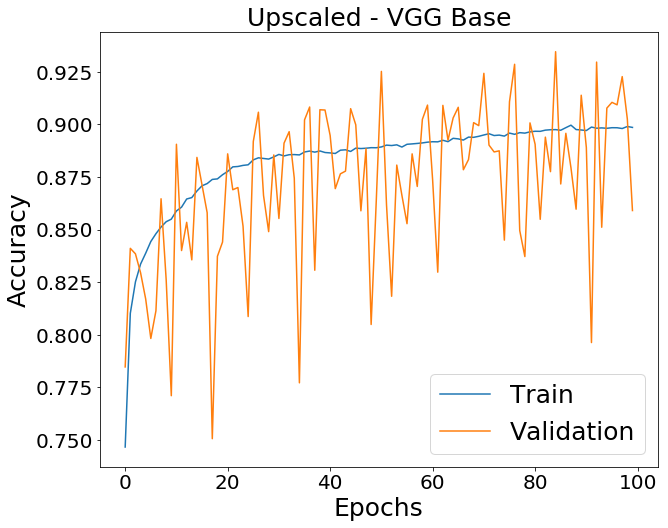

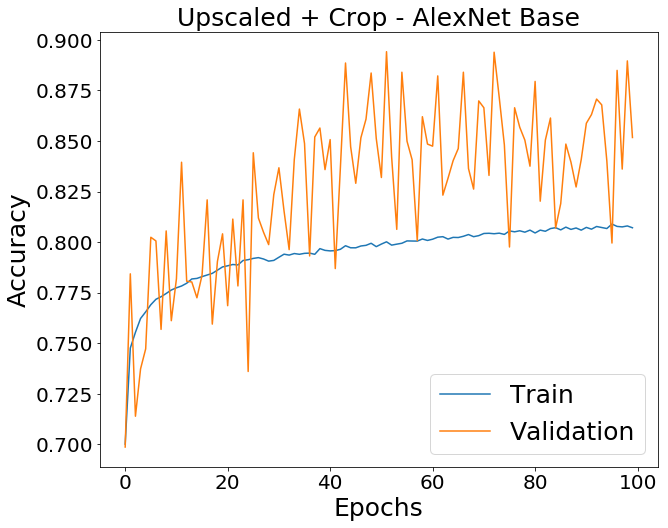

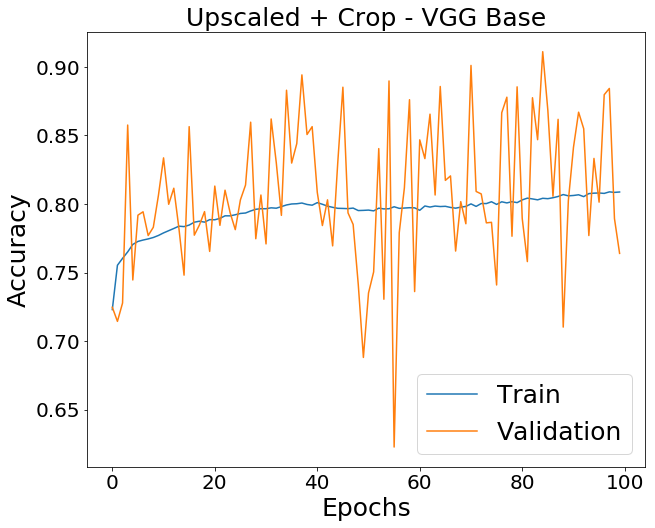

In [350]:
# summarize history for accuracy
def plot_val_acc(results,title):
    plt.plot(results.item()['acc'])
    plt.plot(results.item()['val_acc'])
    plt.title(title,fontsize=25)
    plt.ylabel('Accuracy',fontsize=25)
    plt.xlabel('Epochs',fontsize=25)
    plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
    plt.legend(['Train', 'Validation'], loc='lower right',fontsize=25)

def plot_loss_acc(results,title):
    plt.plot(results.item()['loss'])
    plt.plot(results.item()['val_loss'])
    plt.title(title)
    plt.ylabel('Loss',fontsize=10)
    plt.xlabel('Epoch',fontsize=10)
    plt.legend(['Train', 'Validation'], loc='upper right')

def plot_validation(results, name):
    plt.figure(figsize=(20, 20))
    plt.subplot(1,2,1)
    plot_val_acc(results,title="Accuracy Curve - " + name)
    xint = []
    locs, labels = plt.xticks()
    for each in locs:
        xint.append(int(each))
    plt.xticks(xint)
    plt.xlim((0, 100))
    plt.subplot(1,2,2)
    plot_loss_acc(results,title="Loss Curve - " + name)
    xint = []
    locs, labels = plt.xticks()
    for each in locs:
        xint.append(int(each))
    plt.xticks(xint)
    plt.xlim((0, 100))
    plt.show()

names = ["Raw - AlexNet Base",
         "Raw - VGG Base",
         "Upscaled - AlexNet Base",
         "Upscaled - VGG Base",
        "Upscaled + Crop - AlexNet Base",
         "Upscaled + Crop - VGG Base"]

path2out = "C:/Users/alex/Hands-On-Machine Learning/Project - Mammography/Output/"

for i in range(len(history_list)):
    plt.figure(figsize=(10, 8))
    hist_plot = plot_val_acc(history_list[i],names[i])
    plt.savefig(path2out + 'Validation' + str(i) + '.png')
    plt.show()

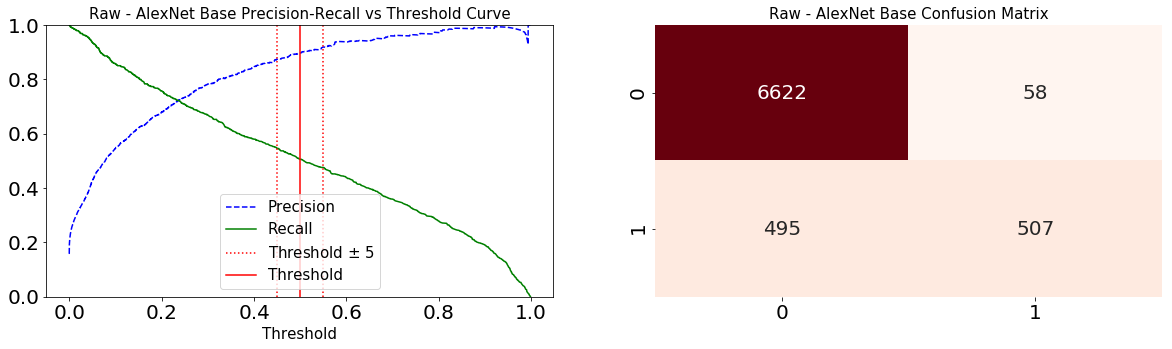

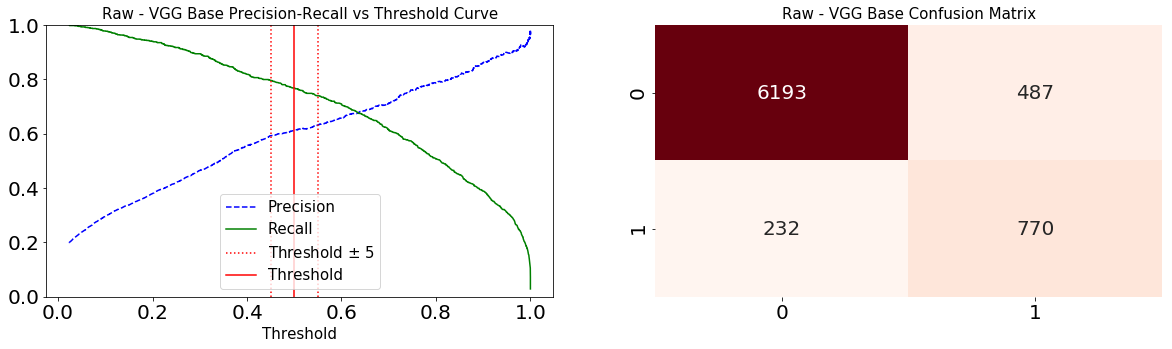

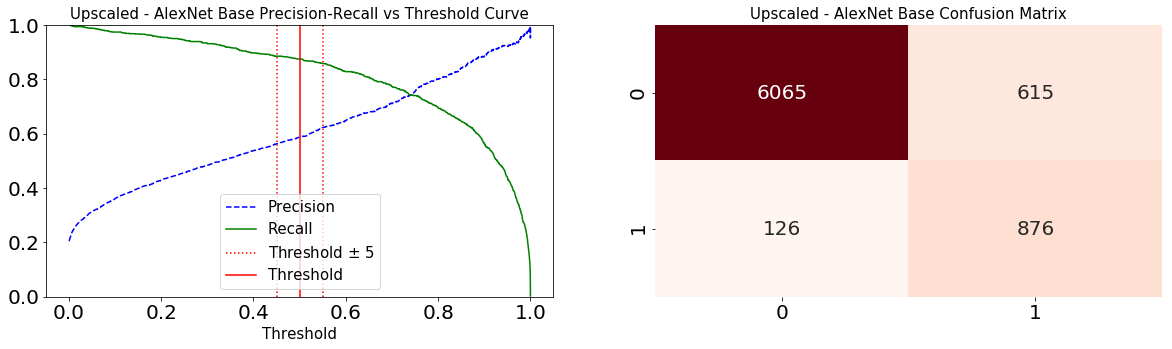

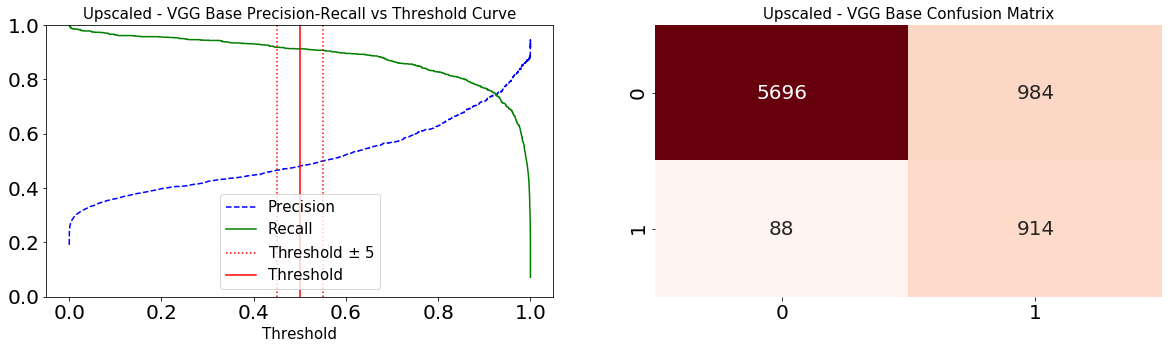

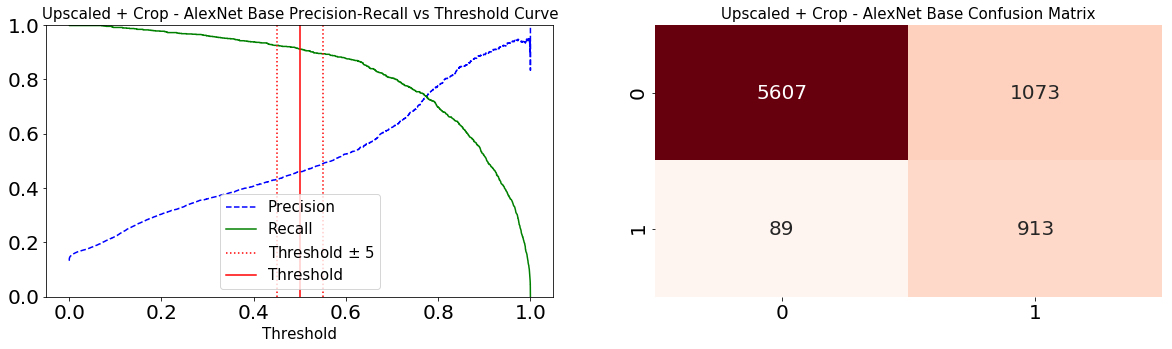

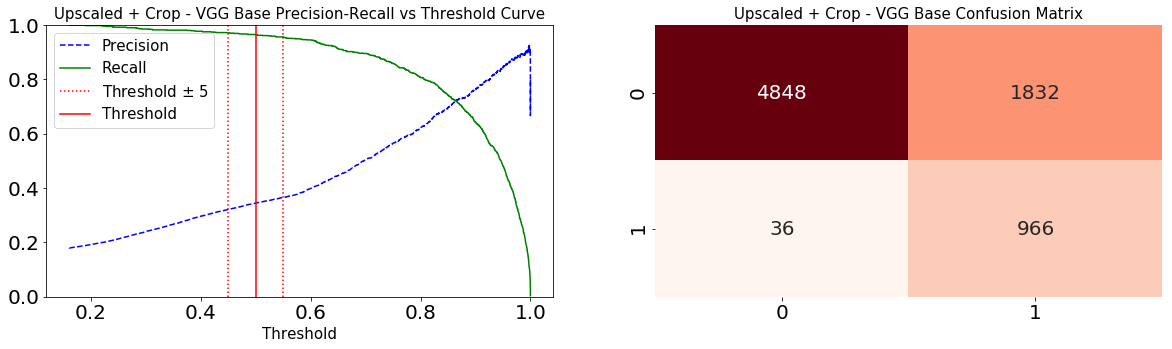

In [385]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

#Plot Precision/Recall vs Threshold Curves
def plot_precision_recall_vs_threshold(train,proba,name=""):
    precisions, recalls, thresholds = precision_recall_curve(train,proba)
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.axvline(x=0.45,linestyle=':',color="Red",label=r"Threshold $\pm$ 5")
    plt.axvline(x=0.5,color="Red",label="Threshold")
    plt.axvline(x=0.55,linestyle=':',color="Red")
    plt.xlabel("Threshold",fontsize=15)
    plt.legend(loc="best",fontsize=15)
    plt.ylim([0, 1])
    plt.title(name + " Precision-Recall vs Threshold Curve",fontsize=15)

#Plot Precision vs Recall
def plot_precision_vs_recall(train,proba,name=""):
    precisions, recalls, thresholds = precision_recall_curve(train,proba)
    plt.plot(recalls[:-1],precisions[:-1],"-")
    plt.xlabel("Recall",fontsize=15)
    plt.ylabel("Precision",fontsize=15)
    plt.title(name + " Precision vs Recall Curve",fontsize=15)
    plt.ylim([0, 1])

#Plot Confusion Matrix
def plot_confusion_matrix(train,predicted,name=""):
    confmat = confusion_matrix(train,predicted)
    sns.heatmap(confmat,cmap="Reds",fmt='g',annot=True,cbar=False,annot_kws={"size": 20}).set_title(name + " Confusion Matrix",fontsize=15)

#Plot Precesion Recall graphs and Confusion Matrices on a grid side by side
def prt_confusion(train,proba,predicted,name=""):
    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    plot_precision_recall_vs_threshold(train,proba,name)
    plt.subplot(1,2,2)
    plot_confusion_matrix(train,predicted,name)
    plt.savefig(path2out + "Perf" + str(i) + '.png')
    plt.show()

#Generate Plots
for i in range(len(model_list)):
    prt_confusion(train = test_labels,
              predicted = models_pred[i],
              proba = models_proba[i],
              name = names[i])


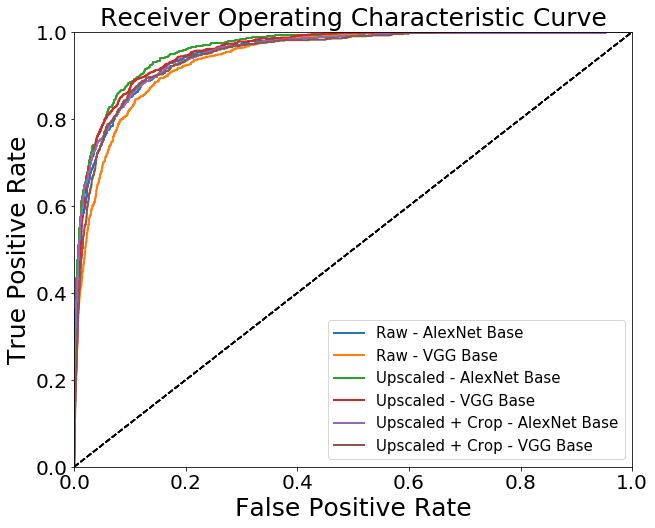

In [368]:
from sklearn.metrics import roc_curve

#Plot ROC Curves
def plot_roc_curve(train,proba,label=""):
    fpr,tpr,thresholds = roc_curve(train,proba)
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0, 1],[0, 1],"k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate",fontsize=25)
    plt.ylabel("True Positive Rate",fontsize=25)
    plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
    plt.title("Receiver Operating Characteristic Curve",fontsize=25)
    
#Observe ROC Curves
plt.figure(figsize=(10,8))
for i in range(len(prediction_list)):
    plot_roc_curve(train = test_labels,proba = models_proba[i], label = names[i])
plt.legend(loc="lower right",fontsize=15)
plt.savefig(path2out +'ROC.png')
plt.show()  

In [351]:
#Compute AUC(ROC), F1 Score, Recall, and Precision for each model and join into a model results table 
import pandas as pd
from sklearn.metrics import roc_auc_score,f1_score,precision_score,recall_score,accuracy_score

scores_acc = [accuracy_score(test_labels,x) for x in models_pred]
scores_auc = [roc_auc_score(test_labels,x) for x in models_proba]
scores_f1 = [f1_score(test_labels,x) for x in models_pred]
scores_precision = [precision_score(test_labels,x) for x in models_pred]
scores_recall = [recall_score(test_labels,x) for x in models_pred]

score_table = pd.DataFrame({
    'Model':names,
    'Accuracy':scores_acc,
    'AUC': scores_auc,
    'F1 Score':scores_f1,
    'Precision':scores_precision,
    'Recall':scores_recall
})

d = dict(selector="th",
    props=[('text-align', 'center')])

df = score_table.sort_values(by='Accuracy',ascending=False).round(3)
df.style.hide_index().set_properties(**{'text-align':'center'}).set_table_styles([d])

Model,Accuracy,AUC,F1 Score,Precision,Recall
Raw - AlexNet Base,0.928,0.954,0.647,0.897,0.506
Raw - VGG Base,0.906,0.943,0.682,0.613,0.768
Upscaled - AlexNet Base,0.904,0.963,0.703,0.588,0.874
Upscaled - VGG Base,0.86,0.957,0.63,0.482,0.912
Upscaled + Crop - AlexNet Base,0.849,0.952,0.611,0.46,0.911
Upscaled + Crop - VGG Base,0.757,0.949,0.508,0.345,0.964


In [120]:
def plot_features(model,input_image):
    # Extracts the outputs of the top 6 layers:
    layer_outputs = [layer.output for layer in model.layers[:6]]
    # Creates a model that will return these outputs, given the model input:
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
    img_tensor = image.img_to_array(input_image)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    # Remember that the model was trained on inputs
    # that were preprocessed in the following way:
    #img_tensor /= 255.
    activations = activation_model.predict(img_tensor)

    layer_names = []
    for layer in model.layers:
        layer_names.append(layer.name)

    images_per_row = 8
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names, activations):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]
        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]
        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
        scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.axis("off")
        plt.imshow(display_grid, cmap='viridis')

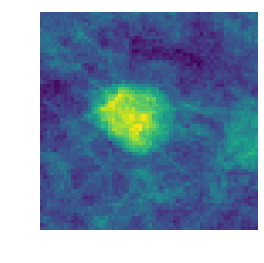

The true label is 1
The predicted label is 1 with probability 0.73


In [360]:
i = 5
j = 2
plt.axis('off')
plt.imshow(test_images[i,:,:,1])
#plt.savefig(path2out + 'Ex1.png')
plt.show()
print("The true label is " + str(test_labels[i]))
print("The predicted label is " + str(models_pred[j][i]) + " with probability " + str(round(models_proba[j][i],2)))

c:\users\alex\miniconda3\envs\tf-gpu3.6\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


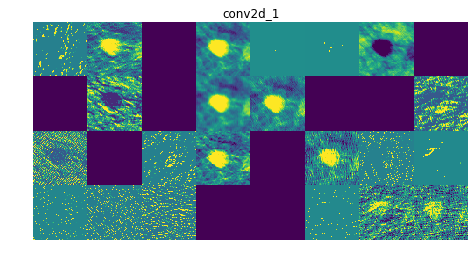

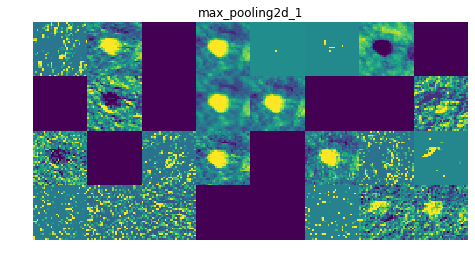

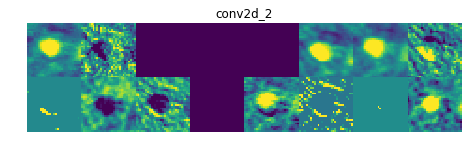

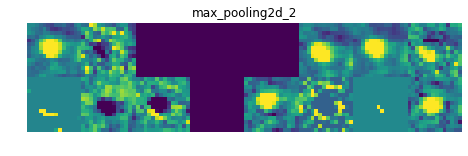

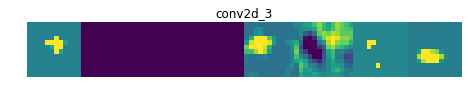

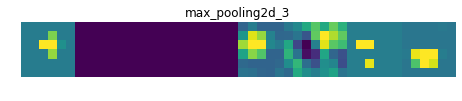

In [237]:
plot_features(model_list[j],test_images[i])

In [353]:
def plot_heatmap(model,entry,layer,image):
    lump_output = model.output[entry]
    last_conv_layer = model.get_layer(layer)

    grads = K.gradients(lump_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([image])

    for i in range(6):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap,0)
    heatmap/=np.max(heatmap)
    #plt.matshow(heatmap)
    heatmap = cv2.resize(heatmap,(64,64))
    heatmap = np.uint8(255*heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap*0.0015 + image[0,:,:,:]
    plt.figure(figsize=(10,15))
    plt.subplot(1,2,1)
    plt.imshow(image[0,:,:,1])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(superimposed_img[:,:,:])
    plt.axis('off')
    plt.show()

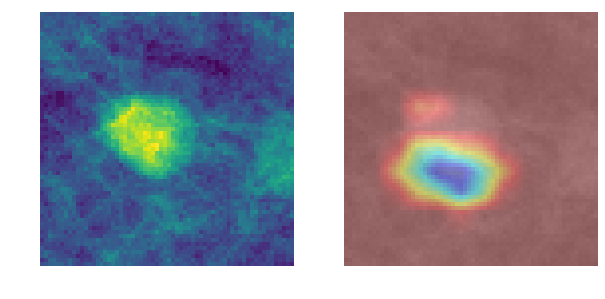

In [354]:
import cv2
entry = 5
image = np.expand_dims(test_images[entry,:,:,:],axis=0)
#model = model_list[2]
model = load_model(path2model + modelnames[2])
layer = "conv2d_3"
preds = model.predict(image,batch_size=5)
entry = 0
plot_heatmap(model,entry,layer,image)

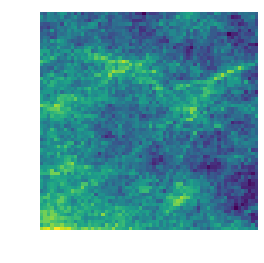

The true label is 0
The predicted label is 0 with probability 0.28


In [355]:
i = 2
j = 2
plt.axis('off')
plt.imshow(test_images[i,:,:,1])
plt.savefig(path2out + 'Ex2.png')
plt.show()
print("The true label is " + str(test_labels[i]))
print("The predicted label is " + str(models_pred[j][i]) + " with probability " + str(round(models_proba[j][i],2)))

c:\users\alex\miniconda3\envs\tf-gpu3.6\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


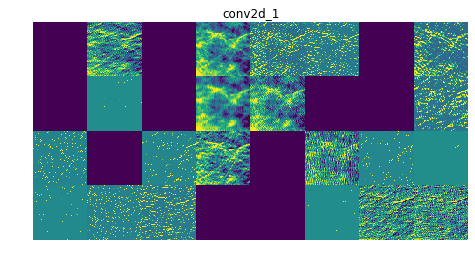

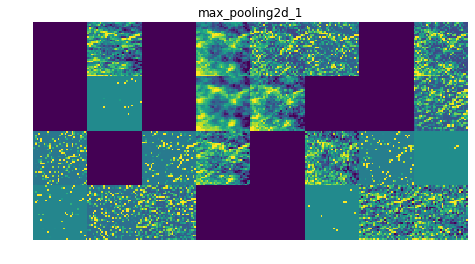

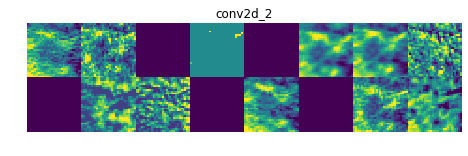

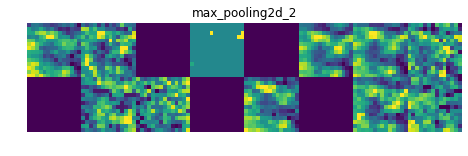

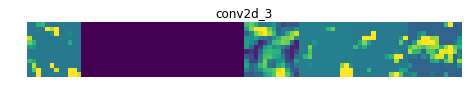

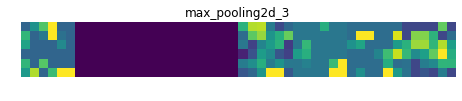

In [239]:
plot_features(model_list[j],test_images[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


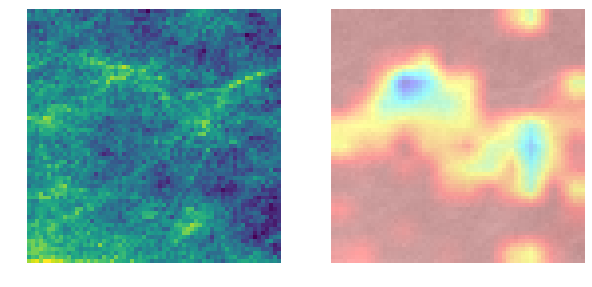

In [315]:
import cv2
entry = 2
image = np.expand_dims(test_images[entry,:,:,:],axis=0)
#model = model_list[2]
model = load_model(path2model + modelnames[2])
layer = "conv2d_3"
preds = model.predict(image,batch_size=5)
entry = 0
plot_heatmap(model,entry,layer,image)

In [157]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(model,layer_name, filter_index, size=64):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]
    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3))
    # Run gradient ascent for 40 steps
    step = 1.
    
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

def plot_feature_map(model,height,width,figscale,layer_name):
    fig, ax = plt.subplots(height,width, 
                           sharex='col', 
                           sharey='row',
                           gridspec_kw = {'wspace':0, 'hspace':0},
                           figsize=(height*figscale,(height*height*figscale)/width))
    #fig.subplots_adjust(wspace=0, hspace=0)
    # axes are in a two-dimensional array, indexed by [row, col]
    for i in range(height):
        for j in range(width):
            ax[i, j].axis('off')
            ax[i, j].set_aspect('equal')  
            filter_img = generate_pattern(model,layer_name, j + i*width)
            ax[i, j].imshow(filter_img)

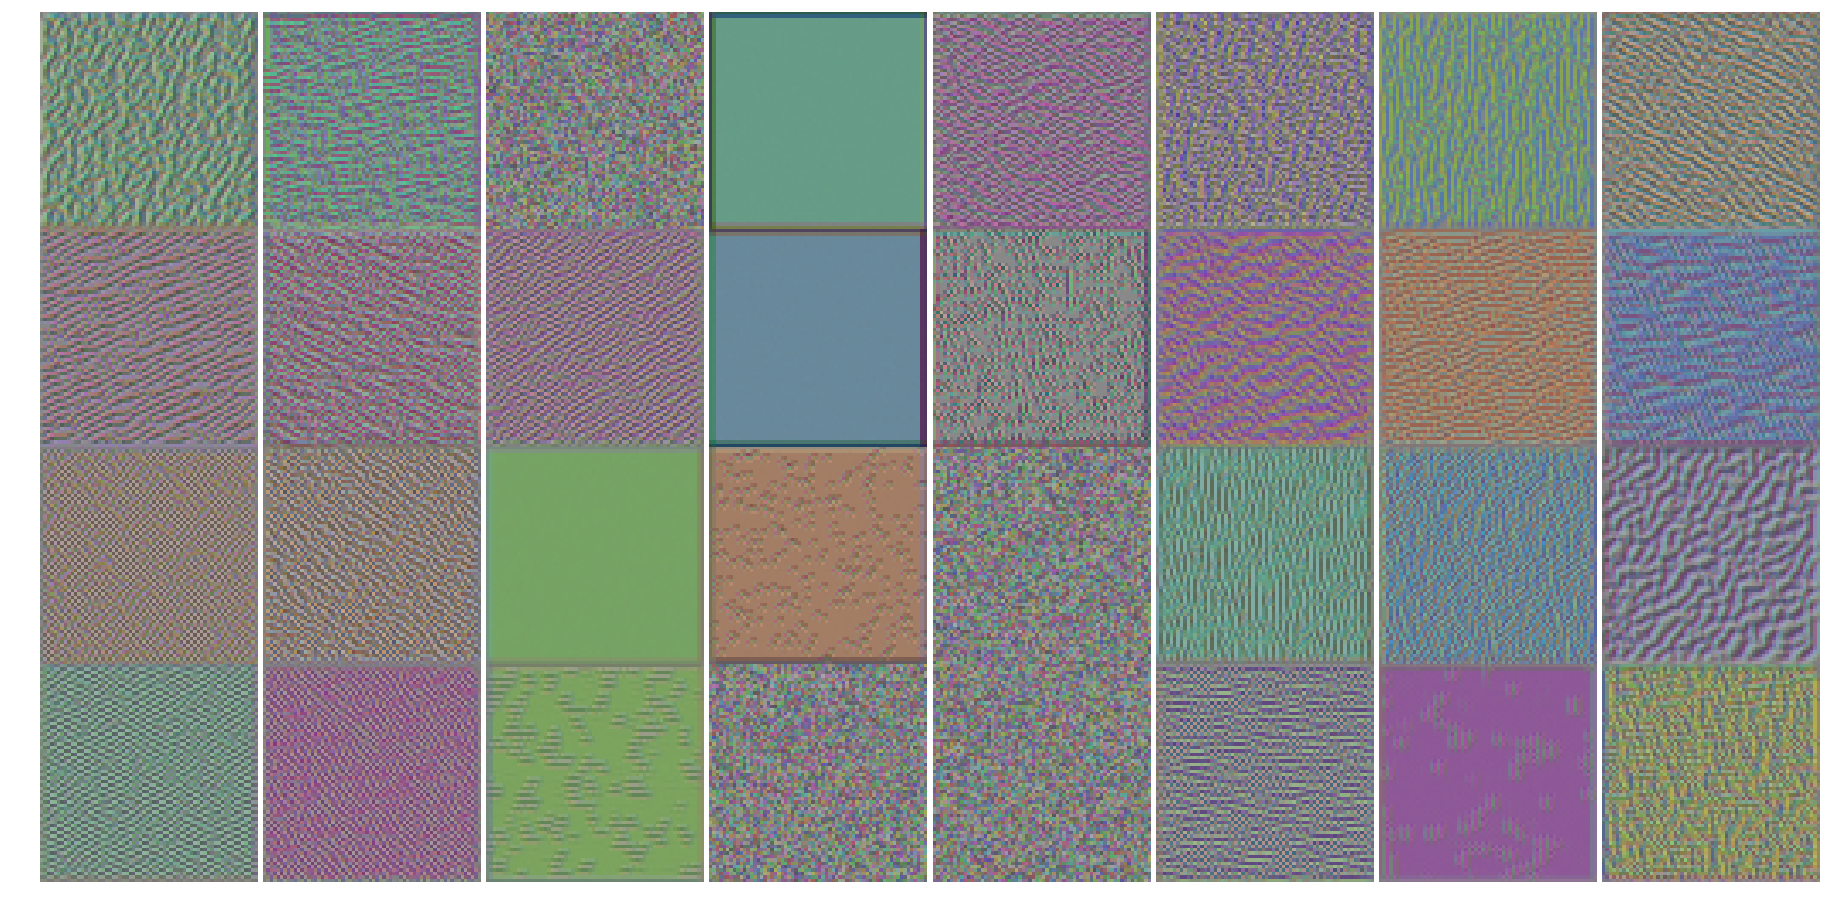

In [356]:
plot_feature_map(model_list[2],4,8,8,"conv2d_1")

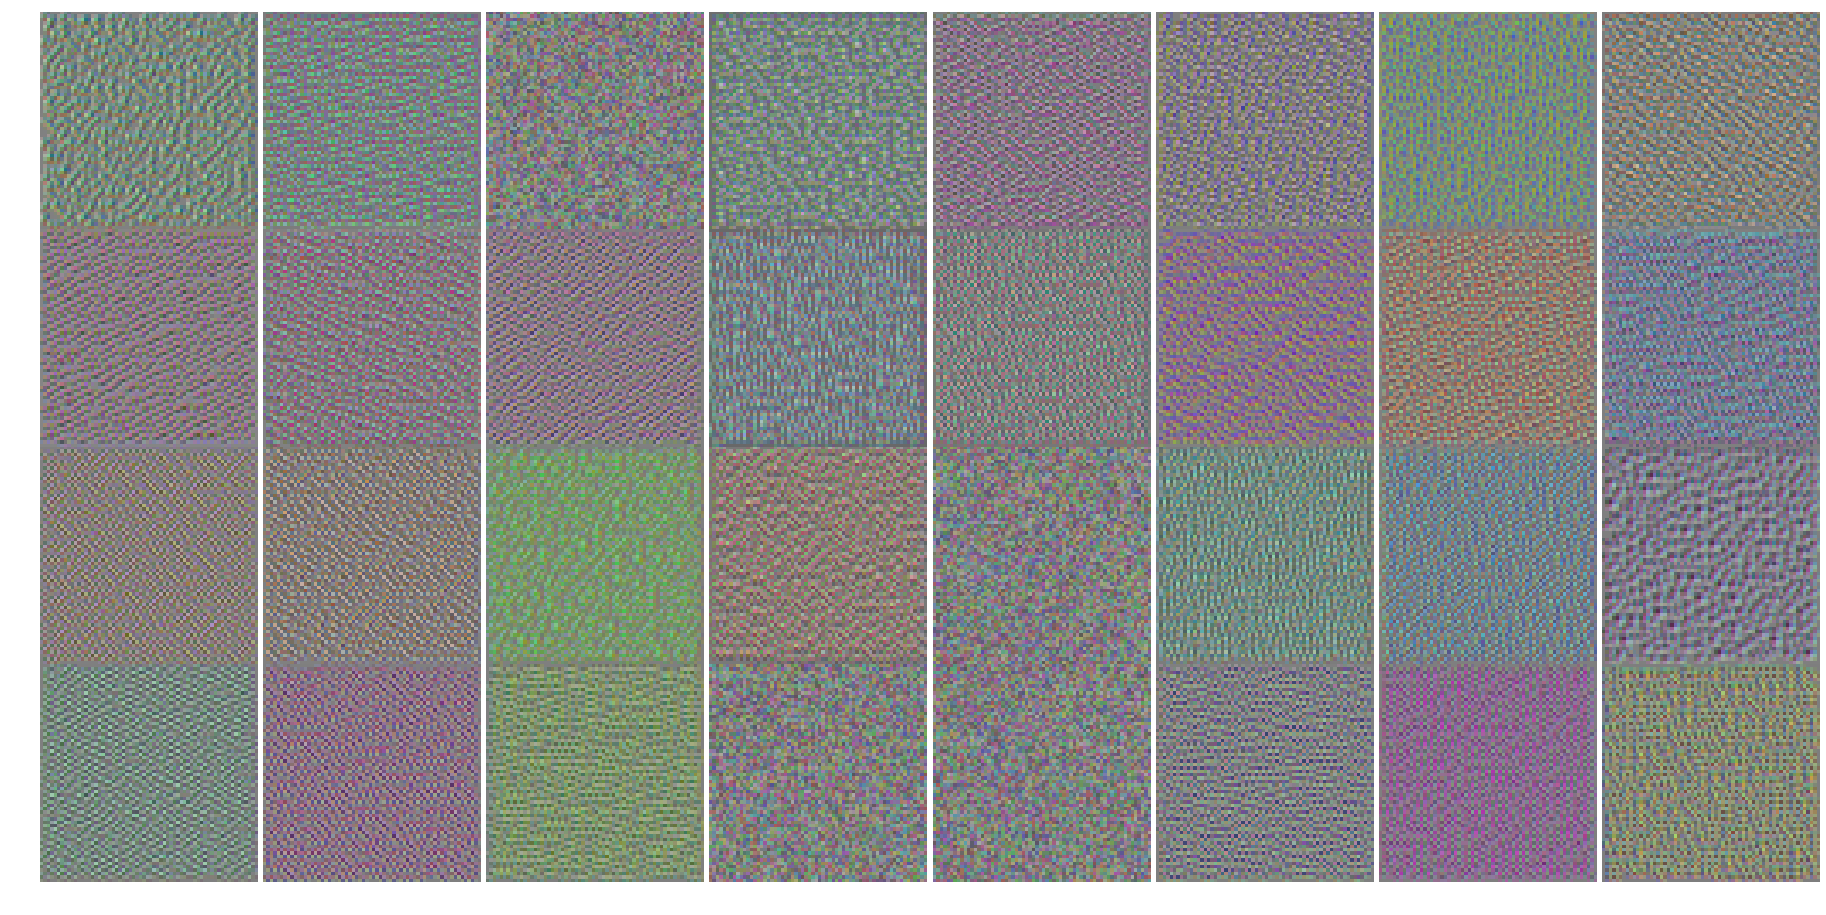

In [357]:
plot_feature_map(model_list[2],4,8,8,"max_pooling2d_1")

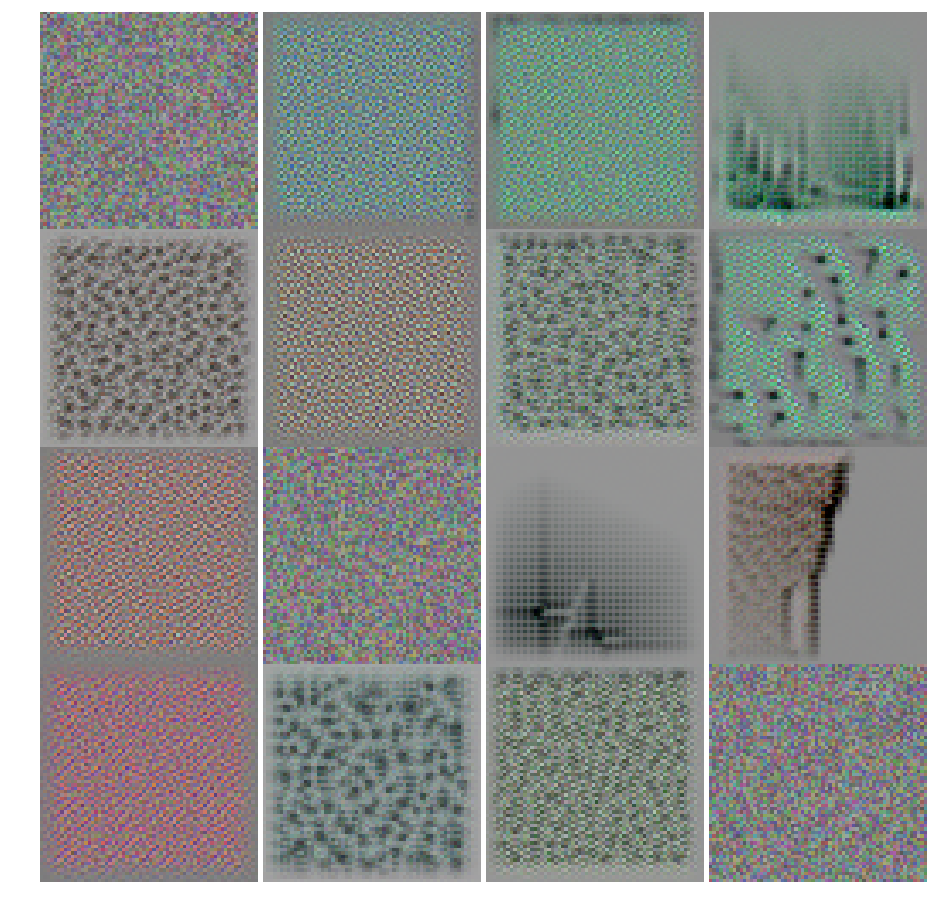

In [358]:
plot_feature_map(model_list[2],4,4,4,"conv2d_2")

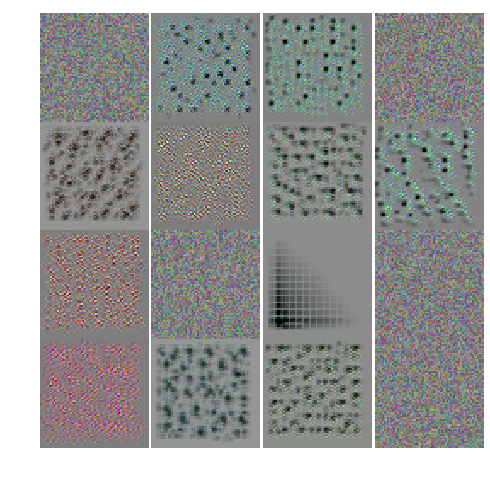

In [361]:
plot_feature_map(model_list[2],4,4,2,"max_pooling2d_2")

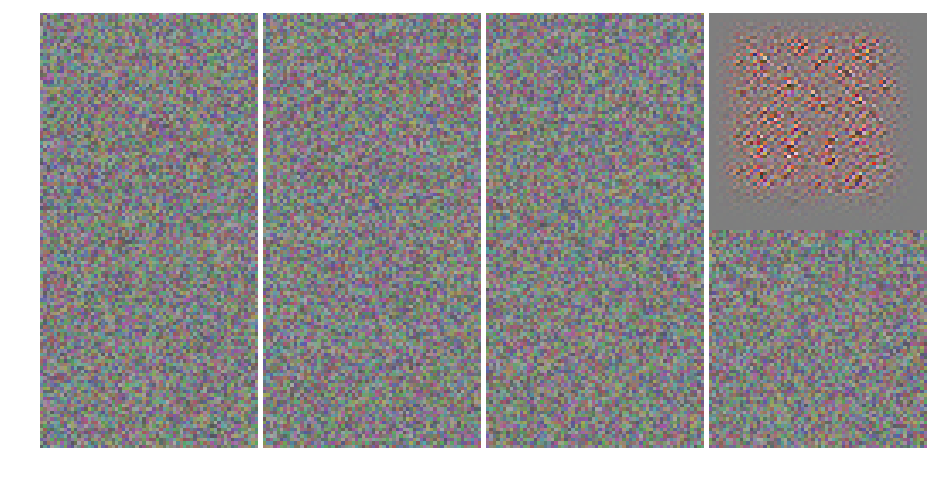

In [359]:
plot_feature_map(model_list[2],2,4,2,"conv2d_3")

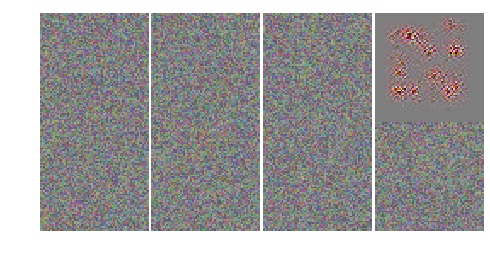

In [363]:
plot_feature_map(model_list[2],2,4,4,"max_pooling2d_3")